In [205]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [206]:
def scale_data(scale_the_data):
    # to work on copy of the data
    data_scaled = scale_the_data.copy()

    # Scaling the data to keep the different attributes in same range.
    data_scaled[data_scaled.columns] = StandardScaler().fit_transform(data_scaled)

    return data_scaled

def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model

In [207]:
data = pd.read_csv("air_sensor001_data.csv")
data = data.sort_values(by='Datetime')
data_sort = data.drop(columns = 'Datetime')
data_sort = data_sort.drop(columns = 'Unnamed: 0')
data_sort = data_sort.drop(columns = 'csq')
data_sort = data_sort.drop(columns = 'deviceid')
data_sort

,eco2,ethanol,h2,pm10,pm100,pm25,rh,temp,voc
0,634,18727,12998,5,7,6,51,25,288
1,606,18710,13023,5,7,7,51,25,296
2,715,18732,12936,6,8,8,51,25,279
3,699,18690,12948,5,6,6,51,25,311
4,695,18737,12958,5,6,6,51,25,273
...,...,...,...,...,...,...,...,...,...
22961,825,18780,12898,3,5,5,52,24,306
22962,855,18772,12875,3,6,4,51,24,313
22963,822,18783,12909,3,5,4,51,24,321
22964,776,18819,12942,3,4,3,52,24,276


In [208]:
df_scale = scale_data(data_sort)
df_scale

,eco2,ethanol,h2,pm10,pm100,pm25,rh,temp,voc
0,-0.136132,0.443187,0.200916,-0.938879,-0.954160,-1.073926,-1.701244,-0.243506,-0.226322
1,-0.158958,0.399111,0.288873,-0.938879,-0.954160,-0.956266,-1.701244,-0.243506,-0.222882
2,-0.070098,0.456151,-0.017218,-0.759670,-0.845742,-0.838605,-1.701244,-0.243506,-0.230193
3,-0.083142,0.347256,0.025001,-0.938879,-1.062579,-1.073926,-1.701244,-0.243506,-0.216430
4,-0.086403,0.469115,0.060184,-0.938879,-1.062579,-1.073926,-1.701244,-0.243506,-0.232774
...,...,...,...,...,...,...,...,...,...
22961,0.019577,0.580603,-0.150913,-1.297298,-1.170998,-1.191587,-1.439304,-2.563987,-0.218581
22962,0.044034,0.559861,-0.231834,-1.297298,-1.062579,-1.309248,-1.701244,-2.563987,-0.215570
22963,0.017132,0.588381,-0.112212,-1.297298,-1.170998,-1.309248,-1.701244,-2.563987,-0.212129
22964,-0.020369,0.681720,0.003891,-1.297298,-1.279416,-1.426908,-1.439304,-2.563987,-0.231483


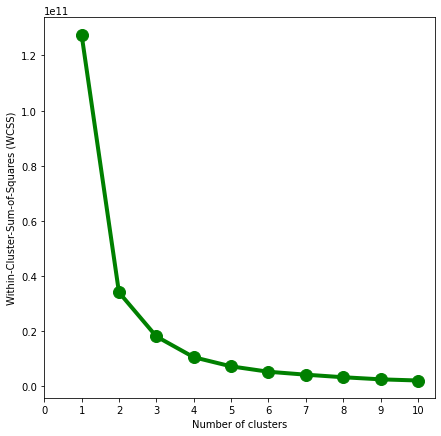

In [209]:
#find the optimal number of clusters using elbow method
x = data_sort[['ethanol','pm25','voc']].values

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.show()

In [210]:
df = df_scale[['ethanol','pm25','voc']]
kmeans = KMeans(n_clusters=5)
cluster = sorted_cluster(df, kmeans)
data_sort['label'] = cluster.labels_
data_sort['Datetime'] = data['Datetime']
data_sort.to_csv('3Dtest.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

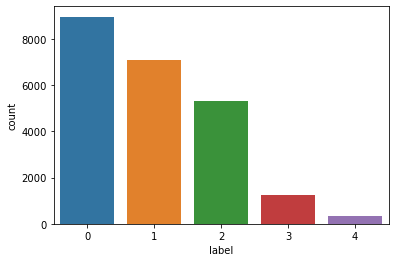

In [211]:
sns.countplot(x=data_sort['label'])

In [212]:
data_sort

,eco2,ethanol,h2,pm10,pm100,pm25,rh,temp,voc,label,Datetime
0,634,18727,12998,5,7,6,51,25,288,2,"2022-05-01,04:29:20"
1,606,18710,13023,5,7,7,51,25,296,2,"2022-05-01,04:30:13"
2,715,18732,12936,6,8,8,51,25,279,2,"2022-05-01,04:31:00"
3,699,18690,12948,5,6,6,51,25,311,2,"2022-05-01,04:32:00"
4,695,18737,12958,5,6,6,51,25,273,2,"2022-05-01,04:33:00"
...,...,...,...,...,...,...,...,...,...,...,...
22961,825,18780,12898,3,5,5,52,24,306,2,"2022-05-17,03:10:00"
22962,855,18772,12875,3,6,4,51,24,313,2,"2022-05-17,03:11:00"
22963,822,18783,12909,3,5,4,51,24,321,2,"2022-05-17,03:12:01"
22964,776,18819,12942,3,4,3,52,24,276,2,"2022-05-17,03:13:07"


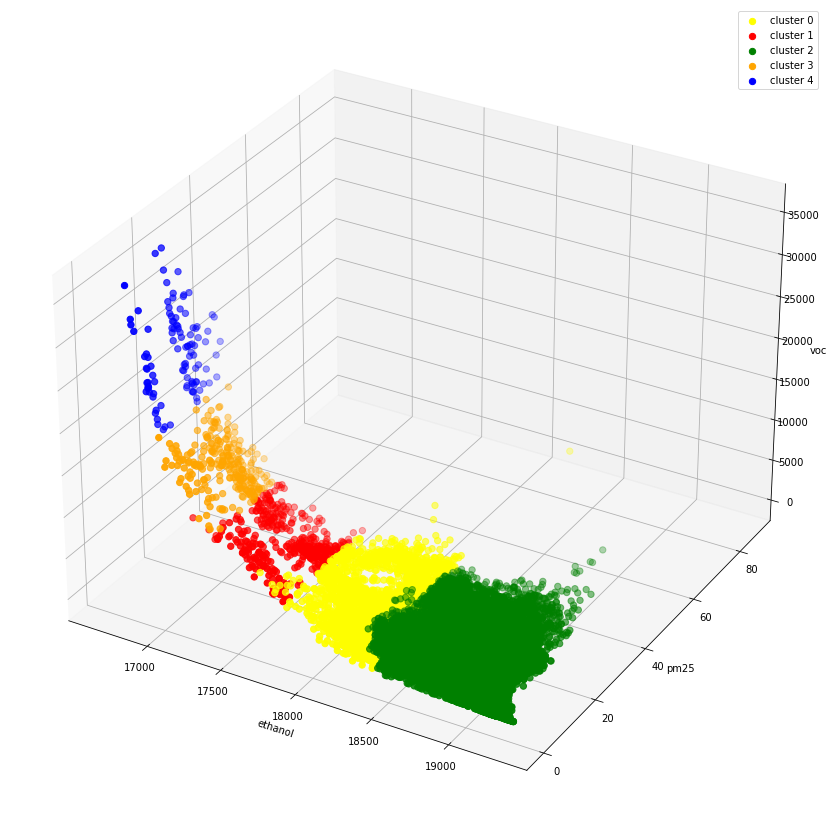

In [213]:
#show 3D K_means

kmeans = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
#y_clusters = kmeans.fit_predict(x)
y_clusters = sorted_cluster(x, kmeans).labels_


fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'yellow', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'red', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = 'orange', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'blue', label = "cluster 4")



ax.set_xlabel('ethanol')
ax.set_ylabel('pm25')
ax.set_zlabel('voc')
ax.legend()
plt.show()